In [11]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import pytorch_models
import torch.optim as optim
dataset_name="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3) uint8
x_test shape: (10000, 32, 32, 3) uint8
y_train shape: (50000, 10) float64
y_test shape: (10000, 10) float64
50000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [4]:
from pytorch import training

import pytorch_models

filters={"mnist":16,"mnist_rot":32,"cifar10":64,"fashion_mnist":32,"lsa16":16}

model = pytorch_models.AllConvolutional(input_shape,num_classes,
                                 filters=filters[dataset.name])
#model= pytorch_models.FFNet(input_shape,num_classes)x
if use_cuda:
    model=model.cuda()
parameters=training.add_weight_decay(model.named_parameters(),1e-13)
optimizer = optim.Adam(parameters, lr=0.0001)
print(model)

rotated_model=pytorch_models.AllConvolutional(input_shape,num_classes,
                                 filters=filters[dataset.name])

if use_cuda:
    rotated_model= rotated_model.cuda()
rotated_parameters=training.add_weight_decay(rotated_model.named_parameters(),1e-13)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.0001)

print(rotated_model)
#summary(model, input_size=[1,28,28])


AllConvolutional(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  (class_conv): Conv2d(128, 10, kernel_size=(1, 1), stride=(1, 1))
)
AllConvolutional(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1,

Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.96, accuracy:  0.257, Time:  0:00:12


Test => Loss: 1.7164, Accuracy: 33.60% (3360/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.64, accuracy:  0.381, Time:  0:00:14


Test => Loss: 1.5940, Accuracy: 40.93% (4093/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.55, accuracy:  0.424, Time:  0:00:13


Test => Loss: 1.5022, Accuracy: 44.65% (4465/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.49, accuracy:  0.451, Time:  0:00:13


Test => Loss: 1.4568, Accuracy: 45.71% (4571/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.44, accuracy:  0.474, Time:  0:00:13


Test => Loss: 1.3899, Accuracy: 48.10% (4810/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.38, accuracy:  0.497, Time:  0:00:13


Test => Loss: 1.3398, Accuracy: 51.44% (5144/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.33, accuracy:  0.517, Time:  0:00:13


Test => Loss: 1.3110, Accuracy: 52.64% (5264/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.27, accuracy:  0.542, Time:  0:00:13


Test => Loss: 1.2315, Accuracy: 56.10% (5610/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:   1.22, accuracy:  0.565, Time:  0:00:12


Test => Loss: 1.1804, Accuracy: 58.51% (5851/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:   1.17, accuracy:  0.582, Time:  0:00:12


Test => Loss: 1.2063, Accuracy: 57.24% (5724/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   1.13, accuracy:    0.6, Time:  0:00:12


Test => Loss: 1.1085, Accuracy: 61.38% (6138/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:  0.612, Time:  0:00:12


Test => Loss: 1.1284, Accuracy: 59.96% (5996/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.627, Time:  0:00:12


Test => Loss: 1.0988, Accuracy: 60.88% (6088/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.638, Time:  0:00:12


Test => Loss: 1.0559, Accuracy: 62.81% (6281/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:  0.996, accuracy:  0.647, Time:  0:00:12


Test => Loss: 0.9910, Accuracy: 65.19% (6519/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:  0.968, accuracy:   0.66, Time:  0:00:12


Test => Loss: 1.0098, Accuracy: 64.66% (6466/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.942, accuracy:  0.666, Time:  0:00:12


Test => Loss: 0.9583, Accuracy: 65.31% (6531/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:  0.922, accuracy:  0.675, Time:  0:00:12


Test => Loss: 0.9567, Accuracy: 66.42% (6642/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.897, accuracy:  0.686, Time:  0:00:12


Test => Loss: 0.9396, Accuracy: 66.71% (6671/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:  0.883, accuracy:  0.689, Time:  0:00:12


Test => Loss: 0.9223, Accuracy: 67.43% (6743/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.858, accuracy:  0.698, Time:  0:00:12


Test => Loss: 0.8812, Accuracy: 69.06% (6906/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.843, accuracy:  0.704, Time:  0:00:12


Test => Loss: 0.8797, Accuracy: 68.98% (6898/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:  0.824, accuracy:  0.711, Time:  0:00:12


Test => Loss: 0.8751, Accuracy: 69.34% (6934/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:  0.803, accuracy:  0.718, Time:  0:00:12


Test => Loss: 0.8850, Accuracy: 69.26% (6926/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:  0.793, accuracy:  0.722, Time:  0:00:12


Test => Loss: 0.8428, Accuracy: 70.89% (7089/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:   0.78, accuracy:  0.728, Time:  0:00:12


Test => Loss: 0.8750, Accuracy: 68.69% (6869/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:  0.764, accuracy:  0.731, Time:  0:00:12


Test => Loss: 0.8531, Accuracy: 69.99% (6999/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:  0.747, accuracy:  0.738, Time:  0:00:12


Test => Loss: 0.8452, Accuracy: 70.51% (7051/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:  0.737, accuracy:  0.741, Time:  0:00:12


Test => Loss: 0.8113, Accuracy: 71.43% (7143/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:  0.721, accuracy:  0.748, Time:  0:00:12


Test => Loss: 0.8305, Accuracy: 70.55% (7055/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:  0.711, accuracy:  0.751, Time:  0:00:12


Test => Loss: 0.8118, Accuracy: 71.88% (7188/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:  0.699, accuracy:  0.757, Time:  0:00:12


Test => Loss: 0.7789, Accuracy: 72.73% (7273/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:  0.689, accuracy:  0.759, Time:  0:00:12


Test => Loss: 0.8227, Accuracy: 71.33% (7133/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:  0.676, accuracy:  0.764, Time:  0:00:12


Test => Loss: 0.7685, Accuracy: 73.19% (7319/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:  0.664, accuracy:  0.768, Time:  0:00:12


Test => Loss: 0.7551, Accuracy: 73.57% (7357/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:  0.658, accuracy:  0.769, Time:  0:00:12


Test => Loss: 0.8212, Accuracy: 72.49% (7249/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:  0.647, accuracy:  0.775, Time:  0:00:12


Test => Loss: 0.7698, Accuracy: 72.96% (7296/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:  0.635, accuracy:  0.777, Time:  0:00:12


Test => Loss: 0.7512, Accuracy: 74.27% (7427/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:  0.623, accuracy:  0.782, Time:  0:00:12


Test => Loss: 0.7238, Accuracy: 74.96% (7496/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:  0.613, accuracy:  0.787, Time:  0:00:12


Test => Loss: 0.7574, Accuracy: 74.03% (7403/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:  0.602, accuracy:   0.79, Time:  0:00:12


Test => Loss: 0.7305, Accuracy: 75.05% (7505/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:  0.598, accuracy:  0.792, Time:  0:00:12


Test => Loss: 0.7445, Accuracy: 74.33% (7433/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:  0.584, accuracy:  0.797, Time:  0:00:12


Test => Loss: 0.7154, Accuracy: 75.50% (7550/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:  0.575, accuracy:    0.8, Time:  0:00:12


Test => Loss: 0.7908, Accuracy: 73.02% (7302/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:  0.565, accuracy:  0.803, Time:  0:00:12


Test => Loss: 0.7861, Accuracy: 73.07% (7307/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:  0.556, accuracy:  0.805, Time:  0:00:12


Test => Loss: 0.6898, Accuracy: 76.24% (7624/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:  0.549, accuracy:  0.808, Time:  0:00:12


Test => Loss: 0.7268, Accuracy: 75.24% (7524/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:   0.54, accuracy:  0.813, Time:  0:00:12


Test => Loss: 0.7006, Accuracy: 76.09% (7609/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:  0.533, accuracy:  0.814, Time:  0:00:12


Test => Loss: 0.7149, Accuracy: 75.47% (7547/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:   0.52, accuracy:  0.817, Time:  0:00:12


Test => Loss: 0.7220, Accuracy: 76.04% (7604/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:  0.513, accuracy:  0.819, Time:  0:00:12


Test => Loss: 0.7080, Accuracy: 75.94% (7594/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:  0.506, accuracy:  0.824, Time:  0:00:12


Test => Loss: 0.7497, Accuracy: 75.39% (7539/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:  0.495, accuracy:  0.827, Time:  0:00:12


Test => Loss: 0.7344, Accuracy: 75.89% (7589/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:  0.486, accuracy:  0.831, Time:  0:00:12


Test => Loss: 0.7207, Accuracy: 76.36% (7636/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:  0.478, accuracy:  0.833, Time:  0:00:12


Test => Loss: 0.7282, Accuracy: 75.72% (7572/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:  0.469, accuracy:  0.835, Time:  0:00:12


Test => Loss: 0.7365, Accuracy: 75.85% (7585/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:  0.461, accuracy:  0.838, Time:  0:00:12


Test => Loss: 0.6806, Accuracy: 77.46% (7746/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:  0.455, accuracy:  0.842, Time:  0:00:12


Test => Loss: 0.7283, Accuracy: 76.47% (7647/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:  0.452, accuracy:  0.843, Time:  0:00:12


Test => Loss: 0.6879, Accuracy: 76.96% (7696/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:   0.44, accuracy:  0.846, Time:  0:00:12


Test => Loss: 0.6673, Accuracy: 78.06% (7806/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:  0.433, accuracy:  0.848, Time:  0:00:12


Test => Loss: 0.6699, Accuracy: 78.10% (7810/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:  0.423, accuracy:  0.852, Time:  0:00:12


Test => Loss: 0.7154, Accuracy: 76.96% (7696/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:  0.413, accuracy:  0.856, Time:  0:00:12


Test => Loss: 0.7674, Accuracy: 76.07% (7607/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:  0.408, accuracy:  0.856, Time:  0:00:12


Test => Loss: 0.6791, Accuracy: 77.65% (7765/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:  0.402, accuracy:  0.859, Time:  0:00:12


Test => Loss: 0.6840, Accuracy: 77.73% (7773/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:  0.393, accuracy:  0.862, Time:  0:00:12


Test => Loss: 0.7454, Accuracy: 76.14% (7614/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:  0.385, accuracy:  0.865, Time:  0:00:12


Test => Loss: 0.7029, Accuracy: 77.56% (7756/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:  0.373, accuracy:  0.869, Time:  0:00:12


Test => Loss: 0.7375, Accuracy: 77.42% (7742/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:  0.368, accuracy:  0.871, Time:  0:00:12


Test => Loss: 0.7459, Accuracy: 76.40% (7640/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:  0.359, accuracy:  0.876, Time:  0:00:12


Test => Loss: 0.7139, Accuracy: 78.02% (7802/10000)


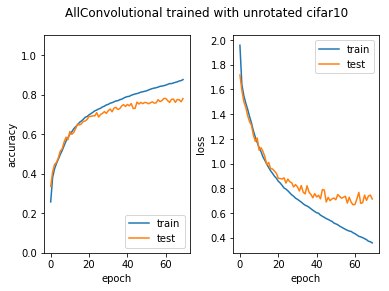

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   2.11, accuracy:  0.205, Time:  0:00:10


Test => Loss: 2.0333, Accuracy: 24.05% (2405/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   2.01, accuracy:  0.249, Time:  0:00:10


Test => Loss: 1.9849, Accuracy: 26.96% (2696/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.95, accuracy:  0.285, Time:  0:00:10


Test => Loss: 1.9169, Accuracy: 28.77% (2877/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.91, accuracy:  0.299, Time:  0:00:10


Test => Loss: 1.8721, Accuracy: 32.32% (3232/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.87, accuracy:  0.321, Time:  0:00:10


Test => Loss: 1.8445, Accuracy: 34.04% (3404/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.84, accuracy:  0.338, Time:  0:00:10


Test => Loss: 1.8144, Accuracy: 34.57% (3457/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.81, accuracy:  0.356, Time:  0:00:10


Test => Loss: 1.7966, Accuracy: 36.21% (3621/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.78, accuracy:  0.372, Time:  0:00:10


Test => Loss: 1.7571, Accuracy: 37.68% (3768/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:   1.77, accuracy:   0.38, Time:  0:00:10


Test => Loss: 1.7322, Accuracy: 39.94% (3994/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:   1.74, accuracy:  0.392, Time:  0:00:10


Test => Loss: 1.7270, Accuracy: 40.26% (4026/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   1.72, accuracy:  0.401, Time:  0:00:10


Test => Loss: 1.7181, Accuracy: 41.06% (4106/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:   1.62, accuracy:  0.415, Time:  0:00:10


Test => Loss: 1.5847, Accuracy: 42.93% (4293/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:   1.58, accuracy:  0.427, Time:  0:00:10


Test => Loss: 1.5519, Accuracy: 43.97% (4397/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:   1.56, accuracy:  0.434, Time:  0:00:10


Test => Loss: 1.5610, Accuracy: 44.00% (4400/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:   1.54, accuracy:  0.443, Time:  0:00:10


Test => Loss: 1.5257, Accuracy: 45.18% (4518/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:   1.52, accuracy:   0.45, Time:  0:00:10


Test => Loss: 1.5705, Accuracy: 43.42% (4342/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:    1.5, accuracy:  0.458, Time:  0:00:10


Test => Loss: 1.4863, Accuracy: 46.30% (4630/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:   1.48, accuracy:  0.463, Time:  0:00:10


Test => Loss: 1.4980, Accuracy: 45.97% (4597/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:   1.47, accuracy:  0.467, Time:  0:00:10


Test => Loss: 1.4736, Accuracy: 47.42% (4742/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:   1.46, accuracy:  0.473, Time:  0:00:10


Test => Loss: 1.4987, Accuracy: 46.30% (4630/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:   1.44, accuracy:  0.476, Time:  0:00:10


Test => Loss: 1.4419, Accuracy: 48.37% (4837/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:   1.43, accuracy:  0.487, Time:  0:00:10


Test => Loss: 1.4371, Accuracy: 48.28% (4828/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:   1.41, accuracy:  0.489, Time:  0:00:10


Test => Loss: 1.4035, Accuracy: 49.94% (4994/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:    1.4, accuracy:  0.495, Time:  0:00:10


Test => Loss: 1.4079, Accuracy: 49.31% (4931/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:   1.38, accuracy:    0.5, Time:  0:00:10


Test => Loss: 1.3945, Accuracy: 50.50% (5050/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:   1.37, accuracy:  0.509, Time:  0:00:10


Test => Loss: 1.3484, Accuracy: 51.73% (5173/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:   1.35, accuracy:  0.514, Time:  0:00:10


Test => Loss: 1.3498, Accuracy: 51.71% (5171/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:   1.34, accuracy:  0.518, Time:  0:00:10


Test => Loss: 1.3342, Accuracy: 52.00% (5200/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:   1.33, accuracy:  0.521, Time:  0:00:10


Test => Loss: 1.3430, Accuracy: 51.50% (5150/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:   1.31, accuracy:  0.529, Time:  0:00:10


Test => Loss: 1.3080, Accuracy: 53.48% (5348/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:   1.29, accuracy:  0.533, Time:  0:00:10


Test => Loss: 1.2825, Accuracy: 54.49% (5449/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:   1.29, accuracy:  0.537, Time:  0:00:10


Test => Loss: 1.2732, Accuracy: 54.32% (5432/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:   1.27, accuracy:  0.539, Time:  0:00:10


Test => Loss: 1.2618, Accuracy: 54.43% (5443/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:   1.26, accuracy:  0.548, Time:  0:00:10


Test => Loss: 1.2781, Accuracy: 54.41% (5441/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:   1.25, accuracy:  0.552, Time:  0:00:10


Test => Loss: 1.2823, Accuracy: 54.78% (5478/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:   1.24, accuracy:  0.555, Time:  0:00:10


Test => Loss: 1.2699, Accuracy: 54.58% (5458/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:   1.23, accuracy:  0.555, Time:  0:00:10


Test => Loss: 1.2882, Accuracy: 54.39% (5439/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:   1.22, accuracy:  0.562, Time:  0:00:10


Test => Loss: 1.2689, Accuracy: 54.14% (5414/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:   1.21, accuracy:  0.565, Time:  0:00:10


Test => Loss: 1.2410, Accuracy: 55.54% (5554/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:    1.2, accuracy:   0.57, Time:  0:00:10


Test => Loss: 1.2404, Accuracy: 55.82% (5582/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:   1.19, accuracy:  0.573, Time:  0:00:10


Test => Loss: 1.2079, Accuracy: 56.65% (5665/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:   1.19, accuracy:  0.576, Time:  0:00:10


Test => Loss: 1.2347, Accuracy: 56.24% (5624/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:   1.18, accuracy:  0.579, Time:  0:00:10


Test => Loss: 1.1841, Accuracy: 57.51% (5751/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:   1.17, accuracy:  0.583, Time:  0:00:10


Test => Loss: 1.1868, Accuracy: 57.72% (5772/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:   1.16, accuracy:  0.583, Time:  0:00:10


Test => Loss: 1.1837, Accuracy: 58.32% (5832/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:   1.15, accuracy:  0.588, Time:  0:00:10


Test => Loss: 1.1775, Accuracy: 57.61% (5761/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:   1.15, accuracy:   0.59, Time:  0:00:10


Test => Loss: 1.2007, Accuracy: 56.96% (5696/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:   1.14, accuracy:  0.593, Time:  0:00:10


Test => Loss: 1.1710, Accuracy: 58.60% (5860/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:   1.13, accuracy:  0.597, Time:  0:00:10


Test => Loss: 1.1706, Accuracy: 58.61% (5861/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:   1.12, accuracy:    0.6, Time:  0:00:10


Test => Loss: 1.1334, Accuracy: 59.50% (5950/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:   1.11, accuracy:  0.603, Time:  0:00:10


Test => Loss: 1.1271, Accuracy: 59.73% (5973/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:   1.11, accuracy:  0.605, Time:  0:00:10


Test => Loss: 1.1398, Accuracy: 59.47% (5947/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:  0.608, Time:  0:00:10


Test => Loss: 1.1210, Accuracy: 59.84% (5984/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:  0.611, Time:  0:00:10


Test => Loss: 1.1047, Accuracy: 60.51% (6051/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.618, Time:  0:00:10


Test => Loss: 1.1135, Accuracy: 60.58% (6058/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.615, Time:  0:00:10


Test => Loss: 1.1246, Accuracy: 60.06% (6006/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:   1.07, accuracy:  0.619, Time:  0:00:10


Test => Loss: 1.1018, Accuracy: 60.85% (6085/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:   1.07, accuracy:  0.621, Time:  0:00:10


Test => Loss: 1.0941, Accuracy: 60.79% (6079/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:  0.623, Time:  0:00:10


Test => Loss: 1.1102, Accuracy: 60.69% (6069/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:  0.627, Time:  0:00:10


Test => Loss: 1.0785, Accuracy: 61.45% (6145/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.629, Time:  0:00:10


Test => Loss: 1.0679, Accuracy: 62.12% (6212/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:   1.04, accuracy:  0.632, Time:  0:00:10


Test => Loss: 1.0909, Accuracy: 61.31% (6131/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.634, Time:  0:00:10


Test => Loss: 1.1057, Accuracy: 60.81% (6081/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.637, Time:  0:00:10


Test => Loss: 1.0609, Accuracy: 62.28% (6228/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.636, Time:  0:00:10


Test => Loss: 1.0664, Accuracy: 62.37% (6237/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.638, Time:  0:00:10


Test => Loss: 1.0422, Accuracy: 63.08% (6308/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.637, Time:  0:00:10


Test => Loss: 1.0496, Accuracy: 62.58% (6258/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.642, Time:  0:00:10


Test => Loss: 1.0361, Accuracy: 63.22% (6322/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.643, Time:  0:00:10


Test => Loss: 1.0856, Accuracy: 61.12% (6112/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:      1, accuracy:  0.645, Time:  0:00:10


Test => Loss: 1.0489, Accuracy: 62.85% (6285/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:  0.993, accuracy:  0.648, Time:  0:00:10


Test => Loss: 1.0465, Accuracy: 63.06% (6306/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:  0.991, accuracy:  0.648, Time:  0:00:10


Test => Loss: 1.1358, Accuracy: 60.47% (6047/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:  0.983, accuracy:  0.653, Time:  0:00:10


Test => Loss: 1.0077, Accuracy: 64.98% (6498/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:  0.983, accuracy:  0.655, Time:  0:00:10


Test => Loss: 1.0133, Accuracy: 63.90% (6390/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:  0.972, accuracy:  0.655, Time:  0:00:10


Test => Loss: 1.0653, Accuracy: 62.10% (6210/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:  0.973, accuracy:  0.655, Time:  0:00:10


Test => Loss: 1.0398, Accuracy: 63.11% (6311/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:  0.967, accuracy:  0.658, Time:  0:00:10


Test => Loss: 1.0292, Accuracy: 63.32% (6332/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:   0.96, accuracy:  0.663, Time:  0:00:10


Test => Loss: 0.9870, Accuracy: 65.24% (6524/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:  0.956, accuracy:  0.664, Time:  0:00:10


Test => Loss: 1.0196, Accuracy: 64.35% (6435/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:  0.949, accuracy:  0.665, Time:  0:00:10


Test => Loss: 1.0261, Accuracy: 63.91% (6391/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:   0.95, accuracy:  0.664, Time:  0:00:10


Test => Loss: 1.0011, Accuracy: 64.73% (6473/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:  0.943, accuracy:  0.666, Time:  0:00:10


Test => Loss: 1.0043, Accuracy: 64.50% (6450/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:  0.937, accuracy:   0.67, Time:  0:00:10


Test => Loss: 1.0087, Accuracy: 64.40% (6440/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:  0.933, accuracy:  0.672, Time:  0:00:10


Test => Loss: 0.9837, Accuracy: 65.47% (6547/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:  0.929, accuracy:  0.674, Time:  0:00:10


Test => Loss: 0.9750, Accuracy: 65.25% (6525/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:  0.931, accuracy:  0.671, Time:  0:00:10


Test => Loss: 0.9663, Accuracy: 66.01% (6601/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:  0.923, accuracy:  0.672, Time:  0:00:10


Test => Loss: 0.9649, Accuracy: 65.84% (6584/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:  0.918, accuracy:  0.676, Time:  0:00:10


Test => Loss: 0.9723, Accuracy: 65.21% (6521/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:  0.916, accuracy:  0.677, Time:  0:00:10


Test => Loss: 0.9803, Accuracy: 65.42% (6542/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:  0.911, accuracy:   0.68, Time:  0:00:10


Test => Loss: 0.9712, Accuracy: 66.25% (6625/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:  0.901, accuracy:  0.681, Time:  0:00:10


Test => Loss: 0.9921, Accuracy: 65.12% (6512/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:  0.902, accuracy:  0.683, Time:  0:00:10


Test => Loss: 0.9630, Accuracy: 66.12% (6612/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:  0.897, accuracy:  0.683, Time:  0:00:10


Test => Loss: 0.9650, Accuracy: 66.32% (6632/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:  0.894, accuracy:  0.686, Time:  0:00:10


Test => Loss: 0.9603, Accuracy: 66.41% (6641/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:   0.89, accuracy:  0.686, Time:  0:00:10


Test => Loss: 0.9337, Accuracy: 67.45% (6745/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:  0.891, accuracy:  0.687, Time:  0:00:10


Test => Loss: 0.9389, Accuracy: 66.84% (6684/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:  0.884, accuracy:  0.687, Time:  0:00:10


Test => Loss: 0.9396, Accuracy: 66.61% (6661/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:  0.882, accuracy:  0.691, Time:  0:00:10


Test => Loss: 0.9790, Accuracy: 66.16% (6616/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:  0.873, accuracy:  0.693, Time:  0:00:10


Test => Loss: 0.9601, Accuracy: 66.11% (6611/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:  0.869, accuracy:  0.694, Time:  0:00:11


Test => Loss: 0.9639, Accuracy: 66.46% (6646/10000)


Epoch 101: 100% (batch 782/782)  ==stats==> loss:   0.87, accuracy:  0.692, Time:  0:00:11


Test => Loss: 0.9327, Accuracy: 67.17% (6717/10000)


Epoch 102: 100% (batch 782/782)  ==stats==> loss:  0.864, accuracy:  0.697, Time:  0:00:11


Test => Loss: 0.9455, Accuracy: 66.92% (6692/10000)


Epoch 103: 100% (batch 782/782)  ==stats==> loss:  0.857, accuracy:  0.699, Time:  0:00:11


Test => Loss: 0.9387, Accuracy: 67.34% (6734/10000)


Epoch 104: 100% (batch 782/782)  ==stats==> loss:  0.857, accuracy:  0.697, Time:  0:00:11


Test => Loss: 0.9100, Accuracy: 68.19% (6819/10000)


Epoch 105: 100% (batch 782/782)  ==stats==> loss:  0.851, accuracy:  0.701, Time:  0:00:11


Test => Loss: 0.9252, Accuracy: 67.79% (6779/10000)


Epoch 106: 100% (batch 782/782)  ==stats==> loss:   0.85, accuracy:  0.702, Time:  0:00:11


Test => Loss: 0.9174, Accuracy: 67.93% (6793/10000)


Epoch 107: 100% (batch 782/782)  ==stats==> loss:  0.846, accuracy:  0.701, Time:  0:00:13


Test => Loss: 0.9012, Accuracy: 68.55% (6855/10000)


Epoch 108: 100% (batch 782/782)  ==stats==> loss:  0.843, accuracy:  0.704, Time:  0:00:13


Test => Loss: 0.9236, Accuracy: 67.67% (6767/10000)


Epoch 109: 100% (batch 782/782)  ==stats==> loss:  0.843, accuracy:  0.703, Time:  0:00:13


Test => Loss: 0.9227, Accuracy: 67.81% (6781/10000)


Epoch 110: 100% (batch 782/782)  ==stats==> loss:  0.836, accuracy:  0.707, Time:  0:00:13


Test => Loss: 0.9160, Accuracy: 68.21% (6821/10000)


Epoch 111: 100% (batch 782/782)  ==stats==> loss:  0.837, accuracy:  0.708, Time:  0:00:13


Test => Loss: 0.9366, Accuracy: 68.21% (6821/10000)


Epoch 112: 100% (batch 782/782)  ==stats==> loss:  0.834, accuracy:  0.707, Time:  0:00:13


Test => Loss: 0.9125, Accuracy: 68.26% (6826/10000)


Epoch 113: 100% (batch 782/782)  ==stats==> loss:   0.83, accuracy:  0.707, Time:  0:00:13


Test => Loss: 0.9227, Accuracy: 67.93% (6793/10000)


Epoch 114: 100% (batch 782/782)  ==stats==> loss:  0.826, accuracy:  0.711, Time:  0:00:13


Test => Loss: 0.9349, Accuracy: 67.29% (6729/10000)


Epoch 115: 100% (batch 782/782)  ==stats==> loss:   0.82, accuracy:  0.712, Time:  0:00:13


Test => Loss: 0.8815, Accuracy: 69.53% (6953/10000)


Epoch 116: 100% (batch 782/782)  ==stats==> loss:  0.818, accuracy:  0.711, Time:  0:00:13


Test => Loss: 0.8869, Accuracy: 69.04% (6904/10000)


Epoch 117: 100% (batch 782/782)  ==stats==> loss:  0.816, accuracy:  0.713, Time:  0:00:13


Test => Loss: 0.8740, Accuracy: 69.50% (6950/10000)


Epoch 118: 100% (batch 782/782)  ==stats==> loss:  0.816, accuracy:  0.714, Time:  0:00:13


Test => Loss: 0.9217, Accuracy: 67.49% (6749/10000)


Epoch 119: 100% (batch 782/782)  ==stats==> loss:  0.815, accuracy:  0.713, Time:  0:00:13


Test => Loss: 0.8793, Accuracy: 68.99% (6899/10000)


Epoch 120: 100% (batch 782/782)  ==stats==> loss:  0.802, accuracy:  0.719, Time:  0:00:13


Test => Loss: 0.9004, Accuracy: 68.46% (6846/10000)


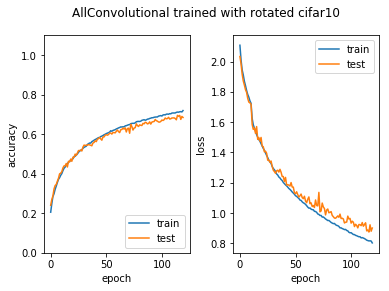

Testing both models on both datasets...


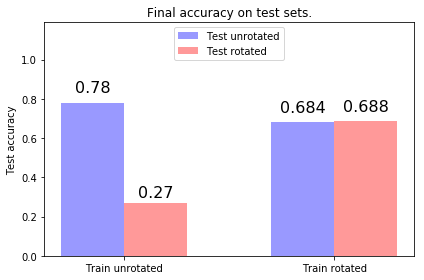

model_rotated_test_dataset score: loss=4.166110, accuracy=0.269700
model_rotated_train_dataset score: loss=4.106322, accuracy=0.281780
model_test_dataset score: loss=0.713947, accuracy=0.780200
model_train_dataset score: loss=0.327069, accuracy=0.886340
rotated_model_rotated_test_dataset score: loss=0.896455, accuracy=0.687700
rotated_model_rotated_train_dataset score: loss=0.801564, accuracy=0.718420
rotated_model_test_dataset score: loss=0.924916, accuracy=0.684300
rotated_model_train_dataset score: loss=0.829460, accuracy=0.712320


In [5]:
batch_size = 64

epochs={'cifar10':70,'mnist':5,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
from pytorch.experiment import rotation
rotated_epochs={'cifar10':120,'mnist':15,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch.experiment.rotation.TrainRotatedConfig(batch_size=batch_size,
                   epochs=epochs[dataset.name],rotated_epochs=rotated_epochs[dataset.name],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,dataset,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [ ]:
from pytorch.experiment import invariance
n_rotations=16
rotations=np.linspace(-180,180,n_rotations,endpoint=False)

vmax_class={"lsa16":6,"mnist":5,"cifar10":10}
vmax_all={"lsa16":3.5,"mnist":5,"cifar10":10}

rotated_invariance_measure,classes=invariance.run(rotated_model,dataset,config,rotations)

invariance_measure,classes=invariance.run(model,dataset,config,rotations)

In [ ]:
invariance.plot(rotated_invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="rotated",vmax=vmax_class[dataset.name])



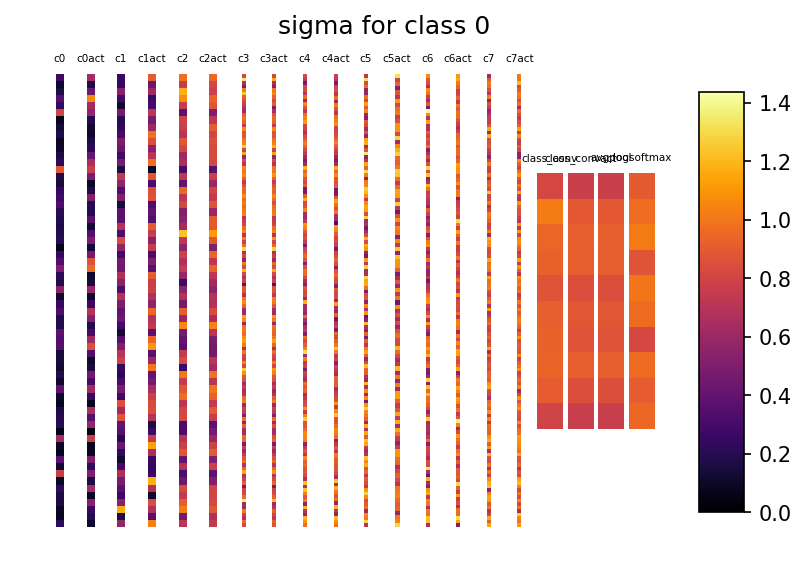

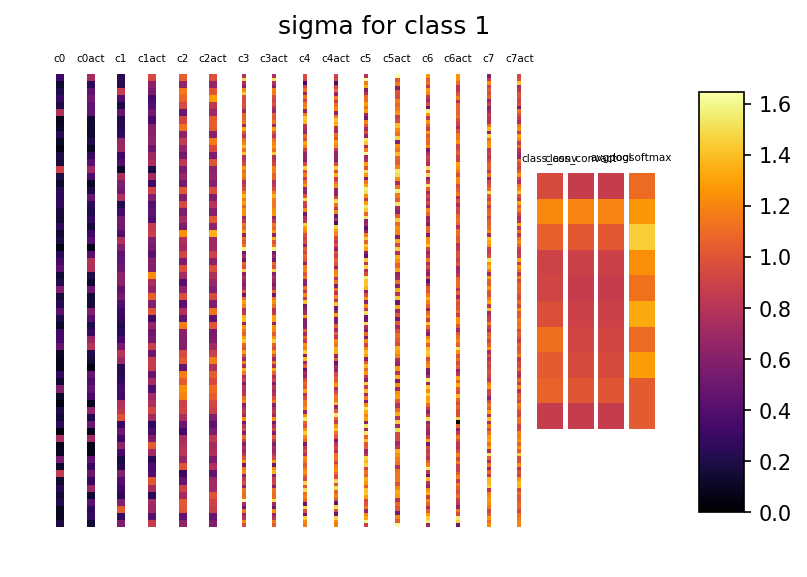

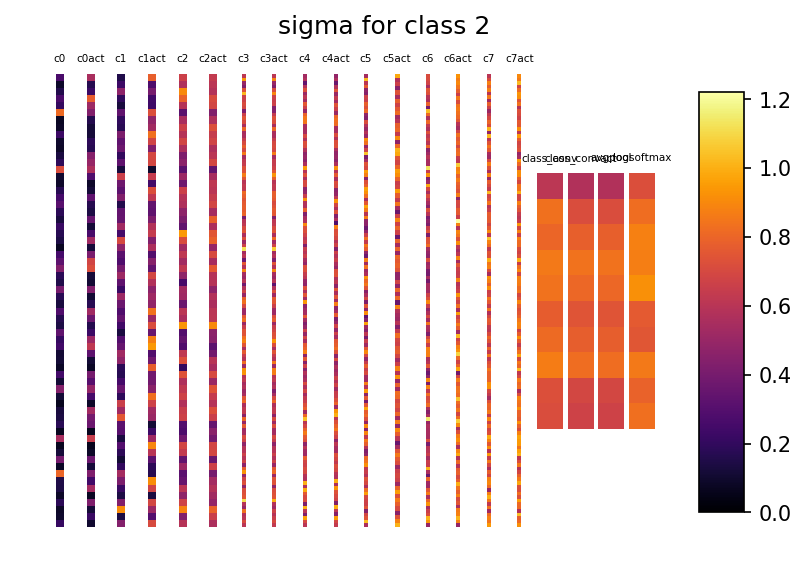

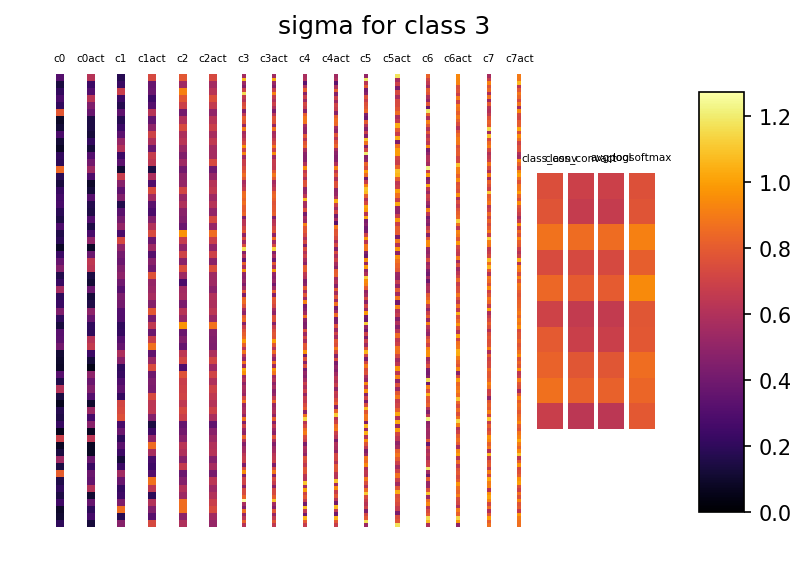

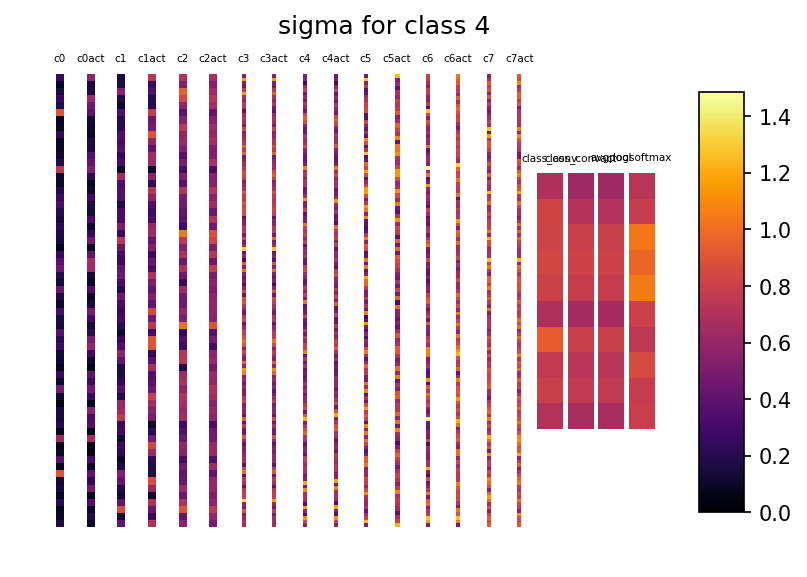

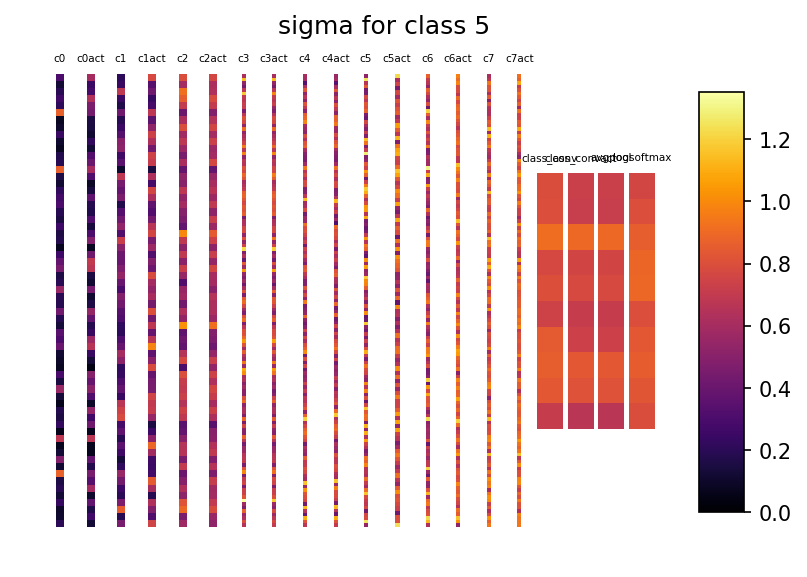

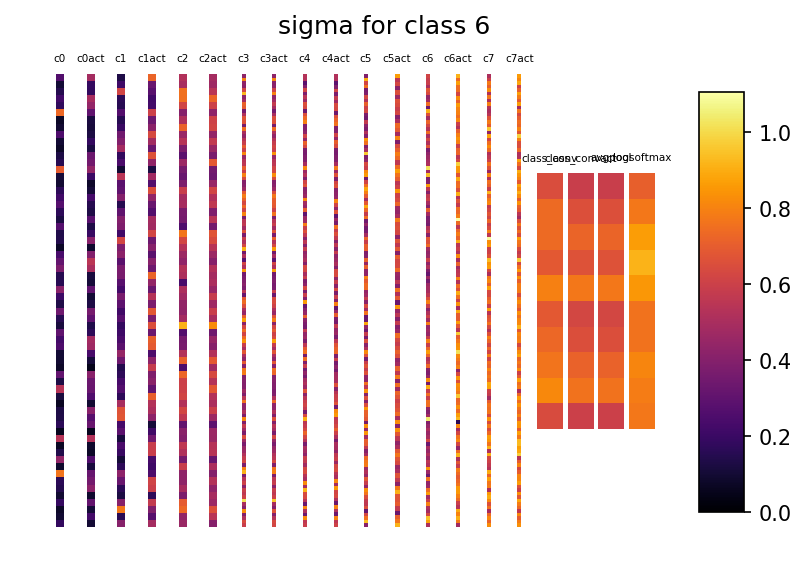

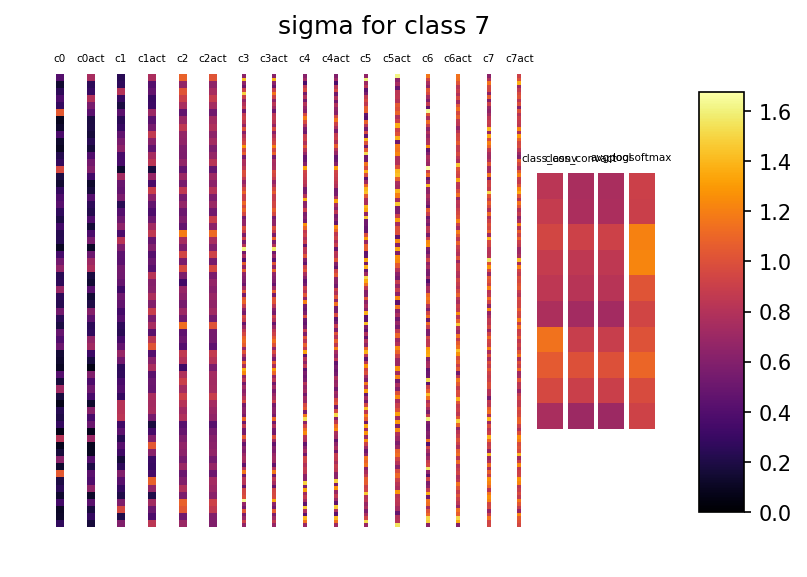

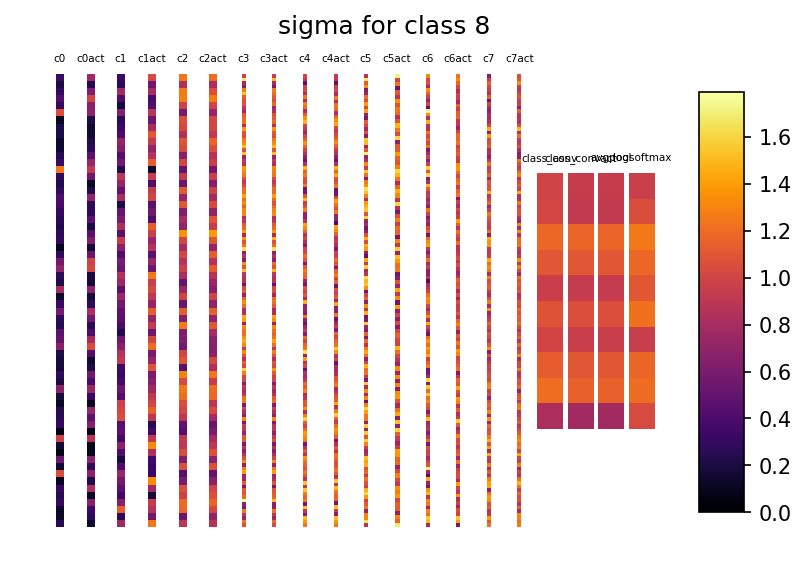

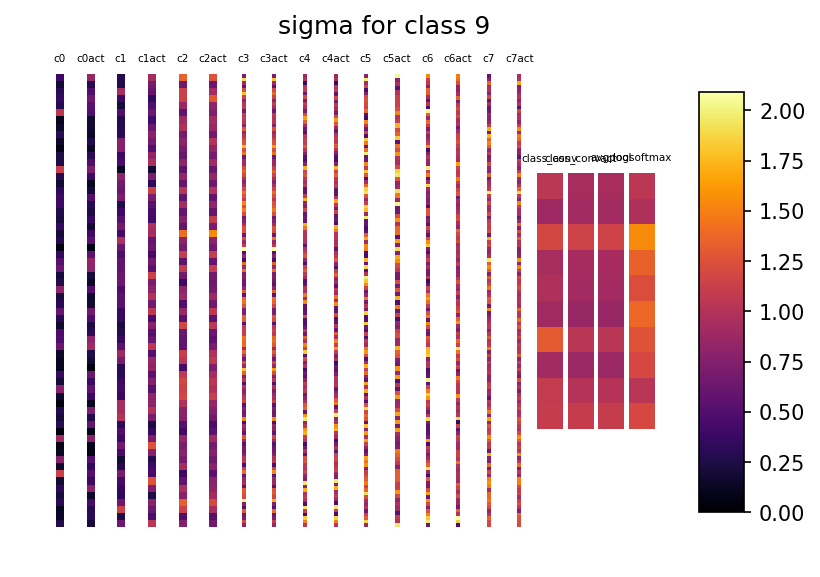

In [8]:

invariance.plot(invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="unrotated",vmax=vmax_class[dataset.name])


In [ ]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(rotated_model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,rotated_model,dataset.name,classes,
                savefig=True,savefig_suffix="rotated",class_names=["all"],vmax=vmax_all[dataset.name])


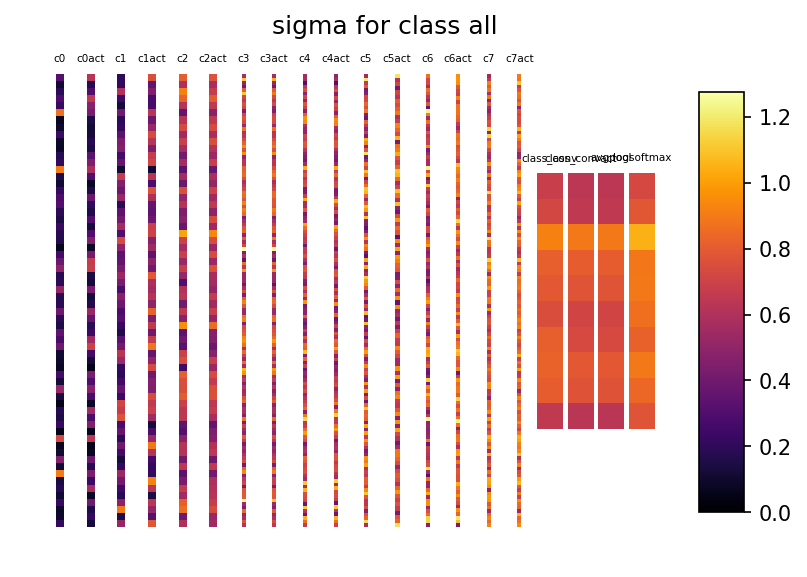

In [10]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,model,dataset.name,classes,
                savefig=True,savefig_suffix="unrotated",class_names=["all"],vmax=vmax_all[dataset.name])